<a href="https://colab.research.google.com/github/raflyaulya/Data-science-Rafly/blob/main/Analyzing_Customer_Sentiment_towards_Indonesian_Cellular_Service_Providers_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Customer Sentiment towards Indonesian Cellular Service Providers using NLP

In this project, we aim to perform sentiment analysis on tweets related to Indonesian cellular service providers. The goal is to predict positive sentiment using various methods such as web scraping, data preprocessing, natural language processing (NLP), and building a machine learning decision tree model.

## Introduction

Cellular service providers have become an integral part of our lives, enabling us to stay connected with others at all times. These providers offer a range of services, from voice calls to mobile data, and are constantly improving their offerings to meet customer demands. However, with the increasing number of users, there is a corresponding increase in complaints and issues related to service quality and customer support. 

To gain insight into customer sentiment towards these service providers, we will be using a dataset of tweets related to Indonesian cellular service providers. By analyzing this data, we hope to identify areas where these providers can improve their services and better meet the needs of their customers.

## Data Source

The data for this project was obtained from a dataset of tweets related to Indonesian cellular service providers. The dataset includes tweets in Indonesian language and contains sentiment labels indicating whether the tweet is positive or negative.

## Project Objective

The main objective of this project is to build a machine learning model that can accurately predict positive sentiment in tweets related to cellular service providers. To achieve this goal, we will be using various techniques such as web scraping, data preprocessing, and NLP to extract relevant features from the tweets. We will then train and test a decision tree model using these features to predict the sentiment of each tweet.

With this project, we hope to provide insights into customer sentiment towards cellular service providers and help these providers improve their services accordingly.

In [1]:
import requests
import string
import re

from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords

!pip install Sastrawi 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory    # for Indonesian language 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path = '/content/gdrive/MyDrive/Colab Notebooks/data sentiment.csv'

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv(path)
df.head()

,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


In [5]:
df

,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>
...,...,...,...
295,296,positive,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan..."
296,297,positive,Alhamdulillah lancar pakai <PROVIDER_NAME>
297,298,positive,"Untung pakai internet <PROVIDER_NAME>, lancar,..."
298,299,positive,"di tempat ramai seperti di lokasi wisata, <PRO..."


In [6]:
def text_processing(text):
  text = text.lower()
  text = re.sub(r'\d+','', text)   
  text = text.translate(str.maketrans('', '', string.punctuation))  
  
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  output = stemmer.stem(text)

  tokens = [word for word in output.split()]

  clean_tokens = tokens[:]
  for token in tokens:
    if token in stopwords.words('indonesian'):
      clean_tokens.remove(token)

  freq = nltk.FreqDist(clean_tokens)

  return freq

In [7]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [8]:
df['tokens'] = df['Text Tweet'].apply(lambda x: text_processing(x))

In [9]:
df

,Id,Sentiment,Text Tweet,tokens
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,"{'usermention': 1, 'boikotprovidername': 1, 'p..."
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...","{'sakti': 1, 'alhamdulillah': 1, 'v': 1, 'prov..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,"{'selamat': 1, 'pagi': 1, 'providername': 1, '..."
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,"{'dear': 1, 'providername': 1, 'jaring': 1, 'd..."
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,"{'selamat': 1, 'malam': 1, 'dusta': 1, 'provid..."
...,...,...,...,...
295,296,positive,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan...","{'pantesan': 1, 'lancar': 2, 'ya': 1, 'sinyal'..."
296,297,positive,Alhamdulillah lancar pakai <PROVIDER_NAME>,"{'alhamdulillah': 1, 'lancar': 1, 'pakai': 1, ..."
297,298,positive,"Untung pakai internet <PROVIDER_NAME>, lancar,...","{'untung': 1, 'pakai': 1, 'internet': 1, 'prov..."
298,299,positive,"di tempat ramai seperti di lokasi wisata, <PRO...","{'ramai': 1, 'lokasi': 1, 'wisata': 1, 'provid..."


In [10]:
ser = df['tokens']

In [11]:
ser.to_list()[0]

FreqDist({'usermention': 1, 'boikotprovidername': 1, 'produk': 1, 'bangsa': 1, 'providername': 1})

In [12]:
def cond_freq_dist(lofd):
  """ takes a list of tuples and retuns a conditional frequency distribution as a pandas dataframe"""
  lis = []
  for fd in lofd:
    dic = {}
    for key, val in fd.items():
      dic[key] = val
    lis.append(dic)

  return lis

In [13]:
lis = cond_freq_dist(ser.to_list())

In [14]:
df2 = pd.DataFrame(lis)

In [15]:
df2.fillna(0, inplace=True)

In [16]:
df3 = df.join(df2)

In [17]:
df3

,Id,Sentiment,Text Tweet,tokens,usermention,boikotprovidername,produk,bangsa,providername,sakti,...,cuaca,pantesan,lombok,ide,ramai,lokasi,wisata,amsyong,stadion,gajayana
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,"{'usermention': 1, 'boikotprovidername': 1, 'p...",1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...","{'sakti': 1, 'alhamdulillah': 1, 'v': 1, 'prov...",0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,"{'selamat': 1, 'pagi': 1, 'providername': 1, '...",0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,"{'dear': 1, 'providername': 1, 'jaring': 1, 'd...",0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,"{'selamat': 1, 'malam': 1, 'dusta': 1, 'provid...",0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,positive,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan...","{'pantesan': 1, 'lancar': 2, 'ya': 1, 'sinyal'...",0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,297,positive,Alhamdulillah lancar pakai <PROVIDER_NAME>,"{'alhamdulillah': 1, 'lancar': 1, 'pakai': 1, ...",0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,298,positive,"Untung pakai internet <PROVIDER_NAME>, lancar,...","{'untung': 1, 'pakai': 1, 'internet': 1, 'prov...",0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
298,299,positive,"di tempat ramai seperti di lokasi wisata, <PRO...","{'ramai': 1, 'lokasi': 1, 'wisata': 1, 'provid...",0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


## Positive Sentiment

In [18]:
df3['positive'] = df3['Sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
X = df3.drop(['Id', 'Sentiment', 'Text Tweet', 'tokens', 'positive'], axis=1)
y = df3['positive']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

## Decision Tree

In [20]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
clf.score(X_train, y_train)

0.7619047619047619

In [22]:
clf.score(X_test, y_test)

0.7

In [23]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.1548013 ,
       0.        , 0.12512418, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.25681631, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
features = dict(zip(np.array(X.columns), clf.feature_importances_))

In [25]:
sorted_features = sorted(features.items(), key=lambda x: x[1], reverse=True)
converted_dict = dict(sorted_features)

print(converted_dict)

{'gratis': 0.25681630898212165, 'lancar': 0.23410125040306712, 'providername': 0.15480129552999017, 'mantap': 0.12808570097810887, 'alhamdulillah': 0.12512418188034985, 'cimahi': 0.052165812761993495, 'internetan': 0.048905449464368894, 'usermention': 0.0, 'boikotprovidername': 0.0, 'produk': 0.0, 'bangsa': 0.0, 'sakti': 0.0, 'v': 0.0, 'selamat': 0.0, 'pagi': 0.0, 'bantu': 0.0, 'kamar': 0.0, 'sinyal': 0.0, 'g': 0.0, 'hilang': 0.0, 'panggil': 0.0, 'darurat': 0.0, 'url': 0.0, 'dear': 0.0, 'jaring': 0.0, 'data': 0.0, 'lot': 0.0, 'banget': 0.0, 'h': 0.0, 'malam': 0.0, 'dusta': 0.0, 'tembak': 0.0, 'paket': 0.0, 'productname': 0.0, 'ganggu': 0.0, 'ya': 0.0, 'pakai': 0.0, 'nya': 0.0, 'udah': 0.0, 'off': 0.0, 'ganti': 0.0, 'yg': 0.0, 'youtube': 0.0, 'senang': 0.0, 'rt': 0.0, 'kamus': 0.0, 'perhapean': 0.0, 'keluh': 0.0, 'gak': 0.0, 'tanggap': 0.0, 'bikin': 0.0, 'emosi': 0.0, 'aja': 0.0, 'pulsa': 0.0, 'curi': 0.0, 'soak': 0.0, 'deh': 0.0, 'bilboard': 0.0, 'iklan': 0.0, 'pesan': 0.0, 'sembunyi':

## Data Visualization

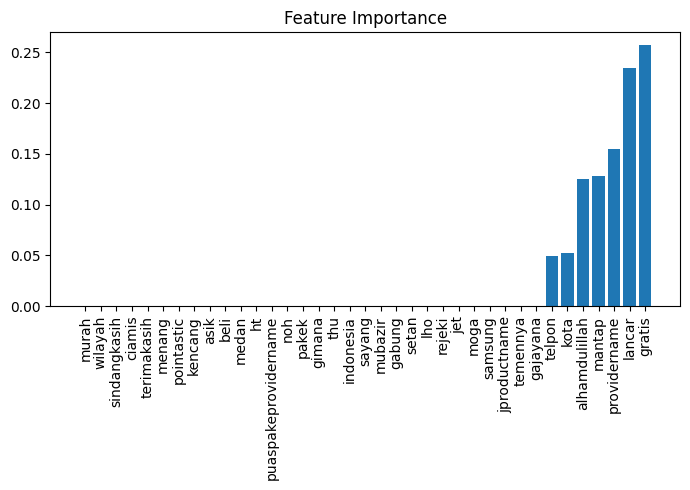

In [45]:
import matplotlib.pyplot as plt


importances = clf.feature_importances_
features = X.columns

indices = np.argsort(importances)[670:]

plt.figure(figsize=(7, 5))
plt.title("Feature Importance")

plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), features[indices], rotation='vertical')
plt.plot(kind='barh')
plt.tight_layout()
plt.show()


In [61]:
sentiment_reviews = df[df['Sentiment'] == 'positive']
sentiment_reviews = sentiment_reviews['Text Tweet'].tolist()
sentiment_reviews = ' '.join(sentiment_reviews)
text = sentiment_reviews

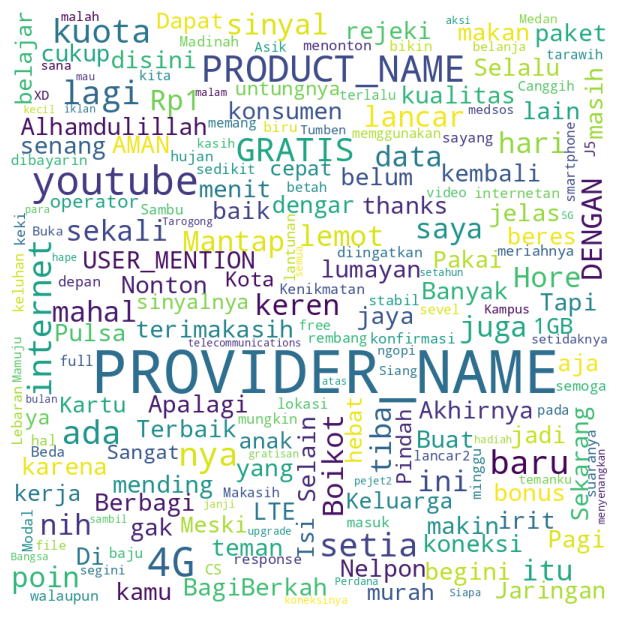

In [63]:
from wordcloud import WordCloud

words = text.split()
unique_words = set(words)
text = " ".join(unique_words)

# Create a WordCloud object with some customization
wordcloud = WordCloud(width=800, height=800, background_color="white", min_font_size=10).generate(text)

# Display the wordcloud using matplotlib
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
